In [1]:
import pandas as pd

In [26]:
data = pd.DataFrame({"Hours": [1, 2, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14],
                   "Score": [64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89]})
data

,Hours,Score
0,1,64
1,2,66
2,4,76
3,5,73
4,5,74
5,6,81
6,6,83
7,7,82
8,8,80
9,10,88


In [27]:
import matplotlib.pyplot as plt

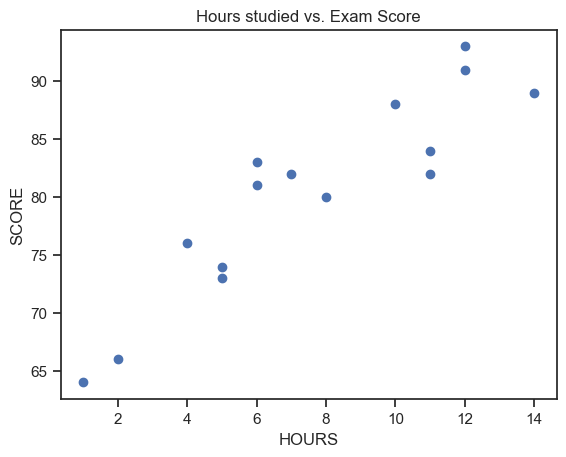

<AxesSubplot:>

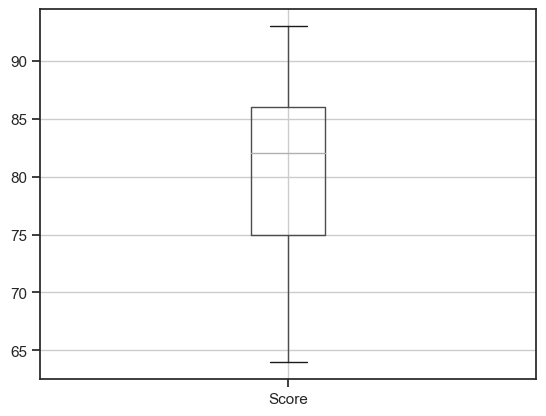

In [29]:
plt.scatter(data.Hours, data.Score)
plt.title("Hours studied vs. Exam Score")
plt.xlabel("HOURS")
plt.ylabel("SCORE")
plt.show()
data.boxplot(column=['Score'])

In [30]:
import statsmodels.api as sm

In [31]:
y = data["Score"] #define response variabale
x = data["Hours"] #define explanatary variables
x = sm.add_constant(x)#add constant to predictor variables
model = sm.OLS(y, x).fit() #fit linear regression model
print(model.summary()) #view model summary

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     63.91
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           2.25e-06
Time:                        14:25:42   Log-Likelihood:                -39.594
No. Observations:                  15   AIC:                             83.19
Df Residuals:                      13   BIC:                             84.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3340      2.106     31.023      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
print("Linear Regression equation : ", str(model.conf_int()[0][0])+"+"+str(model.conf_int()[0][1])+"*Hours")

Linear Regression equation :  60.784238061629345+1.4466816490868335*Hours


In [37]:
import scipy.stats as stats
import numpy as np

In [38]:
mean  = np.mean(data)
mean

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Hours     7.6
Score    80.4
dtype: float64

In [39]:
q3, q1 = np.quantile(data, [0.75, 0.25])
print("Quartile 1: ", q1)
print("Quartile 3: ", q3)

Quartile 1:  7.25
Quartile 3:  81.75


In [40]:
iqr = q3 - q1
print("Inter Quartile range : ", iqr)

Inter Quartile range :  74.5


In [47]:
z = stats.zscore(data)
z

,Hours,Score
0,-1.740865,-1.989182
1,-1.477098,-1.746599
2,-0.949563,-0.533683
3,-0.685795,-0.897558
4,-0.685795,-0.776266
5,-0.422028,0.072775
6,-0.422028,0.315358
7,-0.158260,0.194067
8,0.105507,-0.048517
9,0.633042,0.921816


In [48]:
data_clean = data[(abs(z)<1)]
data_clean

,Hours,Score
0,NaN,NaN
1,NaN,NaN
2,4.0,76.0
3,5.0,73.0
4,5.0,74.0
5,6.0,81.0
6,6.0,83.0
7,7.0,82.0
8,8.0,80.0
9,10.0,88.0


In [49]:
df = data_clean.dropna()
df

,Hours,Score
2,4.0,76.0
3,5.0,73.0
4,5.0,74.0
5,6.0,81.0
6,6.0,83.0
7,7.0,82.0
8,8.0,80.0
9,10.0,88.0
10,11.0,84.0
11,11.0,82.0


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

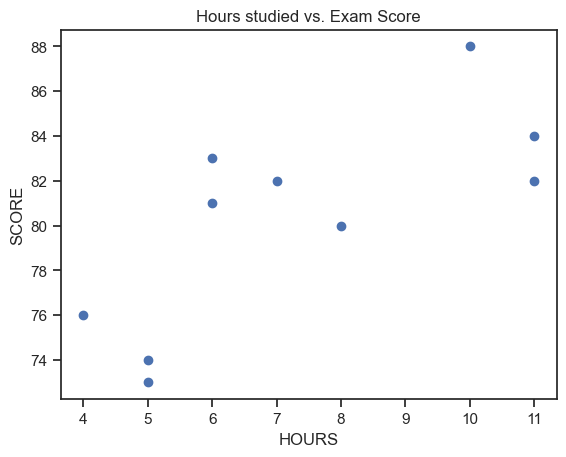

In [63]:
plt.scatter(df.Hours, df.Score)
plt.title("Hours studied vs. Exam Score")
plt.xlabel("HOURS")
plt.ylabel("SCORE")
plt.show()

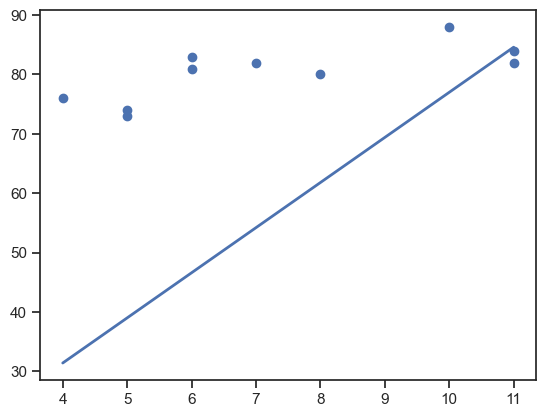

In [100]:
#df = sns.load_dataset("anscombe")
fig, ax = plt.subplots()
ax.scatter(df["Hours"], df["Score"])
x = df["Hours"]
y = (mean["Hours"]*x) + 1
ax.plot(x, y, linewidth=2.0)
plt.show()